In [45]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm  # colormaps

%matplotlib inline

In [46]:
from keras.datasets import cifar10
(cx_train, cy_train),(cx_test, cy_test) = cifar10.load_data()
print(cx_train.shape)
print(cy_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [53]:
def plot_colour_images(images_to_plot, titles=None, ncols=6, thefigsize=(18,9)):
    
    n_images = images_to_plot.shape[0]
    
    nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,:,:,:]) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None:
            ax[i].set_title(titles[i])

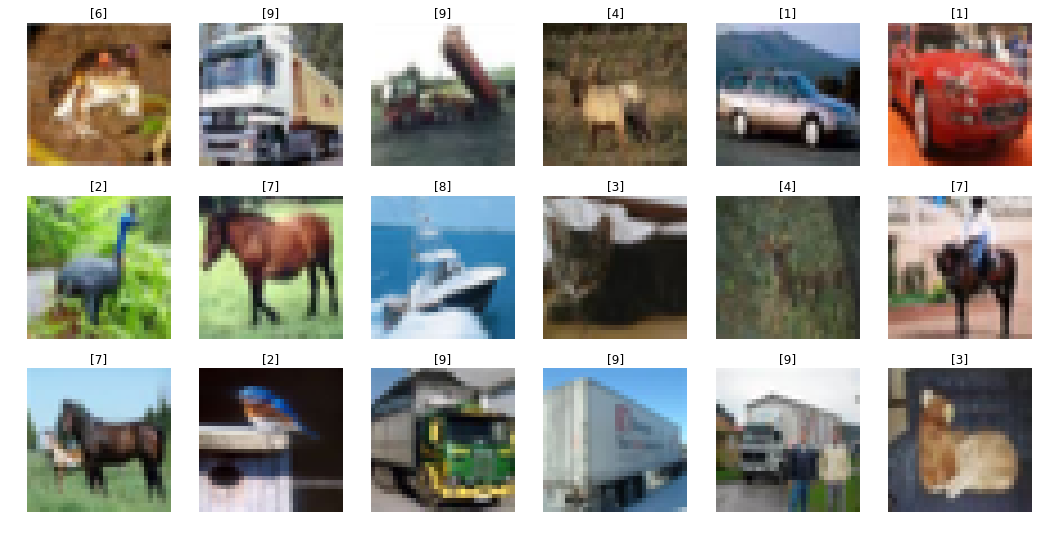

In [54]:
plot_colour_images( cx_train[:18,:,:], ncols=6,titles= cy_train[:18])

In [55]:
from keras import layers
from keras import models 
from keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),  padding='same',activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization()) 
model.add(layers.Conv2D(32, (3, 3),  padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

          
model.add(layers.Conv2D(64, (3, 3),  padding='same',activation='relu'))
model.add(BatchNormalization()) 
model.add(layers.Conv2D(64, (3, 3),  padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),  padding='same',activation='relu'))
model.add(BatchNormalization()) 
model.add(layers.Conv2D(128, (3, 3),  padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



In [56]:
#classification layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [57]:
# we need to reshape the training data to have 4D, since we want each digit to be read as an image
# with only one colour channel

cx_train = cx_train.reshape(cx_train.shape)
cx_test = cx_test.reshape(cx_test.shape)

cx_train.shape, cx_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [58]:
# to use softmax, we need to alter the class representations from integers to 'one-hot' 
from keras.utils.np_utils import to_categorical
cy_train_one_hot = to_categorical(cy_train)
cy_test_one_hot = to_categorical(cy_test)
cy_train_one_hot.shape, cy_train_one_hot.shape

((50000, 10), (50000, 10))

In [59]:
train_size = 25000

In [61]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(cx_train[:train_size], cy_train_one_hot[:train_size,:], epochs=5, batch_size=64, shuffle=True)

Epoch 1/5
25000/25000 [==============================] - 172s 7ms/step - loss: 0.4232 - acc: 0.8517
Epoch 2/5
25000/25000 [==============================] - 176s 7ms/step - loss: 0.3149 - acc: 0.8918
Epoch 3/5
25000/25000 [==============================] - 183s 7ms/step - loss: 0.2511 - acc: 0.9124
Epoch 4/5
25000/25000 [==============================] - 200s 8ms/step - loss: 0.1998 - acc: 0.9310
Epoch 5/5
25000/25000 [==============================] - 192s 8ms/step - loss: 0.1702 - acc: 0.9425


In [63]:
history.history

{'loss': [0.42317594882965087,
  0.3148633498954773,
  0.25114558561325073,
  0.19983629228591918,
  0.17020882633209228],
 'acc': [0.85172,
  0.8917600000190735,
  0.9124000000190735,
  0.931039999961853,
  0.942479999961853]}

In [64]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d_7': <keras.layers.convolutional.Conv2D at 0xb4bb4d080>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0xb4bb4d128>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0xb4bb6ec88>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0xb4d43ac88>,
 'conv2d_9': <keras.layers.convolutional.Conv2D at 0xb4bb6e0b8>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0xb4d6fae80>,
 'conv2d_10': <keras.layers.convolutional.Conv2D at 0xb4e5acac8>,
 'max_pooling2d_5': <keras.layers.pooling.MaxPooling2D at 0xb4e6e45f8>,
 'conv2d_11': <keras.layers.convolutional.Conv2D at 0xb4e5ac860>,
 'batch_normalization_6': <keras.layers.normalization.BatchNormalization at 0xb504cfdd8>,
 'conv2d_12': <keras.layers.convolutional.Conv2D at 0xb5054c438>,
 'max_pooling2d_6': <keras.layers.pooling.MaxPooling2D at 0xb50599b00>,
 'flatten_2': <keras.layers.core.Flatten at 0xb4bb63438>,
 'dense_3': <keras.layers.core.Dense at 0xb4bb63828>,
 'dense_4

In [65]:
from keras import backend as K
def get_iterate(layer_name, filter_index, layer_dict):
    
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    print(model.inputs)
    input_img = model.inputs[0]

    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]
    print(grads)

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])
    
    return iterate

In [66]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((0, 1, 2))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [68]:
layer_name = 'conv2d_12'
processed_filters = []
for i in range(0, 128):
    iterate = get_iterate(layer_name, i, layer_dict)
    
    input_img_data = np.random.random((1,32, 32, 3)) * 20 + 128.
    step = 1
    
    for _ in range(20):
        loss_value, grads_value = iterate([input_img_data])
        # some filters get stuck to 0, we can skip them
        if loss_value <= K.epsilon():
            continue
        #print('loss_value ', loss_value)
        input_img_data += grads_value * step
    img = deprocess_image(input_img_data[0])
    processed_filters.append((img, loss_value))

[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_256/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_257/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_258/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_259/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_260/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_261/conv2d_7/convolution_grad

[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_303/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_304/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_305/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_306/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_307/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_308/conv2d_7/convolution_grad

[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_350/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_351/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_352/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_353/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_354/conv2d_7/convolution_grad/Conv2DBackpropInput:0", shape=(?, 32, 32, 3), dtype=float32)
[<tf.Tensor 'conv2d_7_input:0' shape=(?, 32, 32, 3) dtype=float32>]
Tensor("gradients_355/conv2d_7/convolution_grad

In [ ]:
from keras.preprocessing.image import save_img
def draw_filters(filters, model_name, n=None):
        """Draw the best filters in a nxn grid.
        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            n: dimension of the grid.
               If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype='uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        save_img('{0:}_{1:}_{2:}x{2:}.png'.format(model_name, layer_name, n), stitched_filters)


In [ ]:
model_name = 'cifar-10'
draw_filters(processed_filters,  model_name)

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('%s_filter_%d.png' % (layer_name, filter_index))
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


NameError: name 'layer_name' is not defined

Populating the interactive namespace from numpy and matplotlib


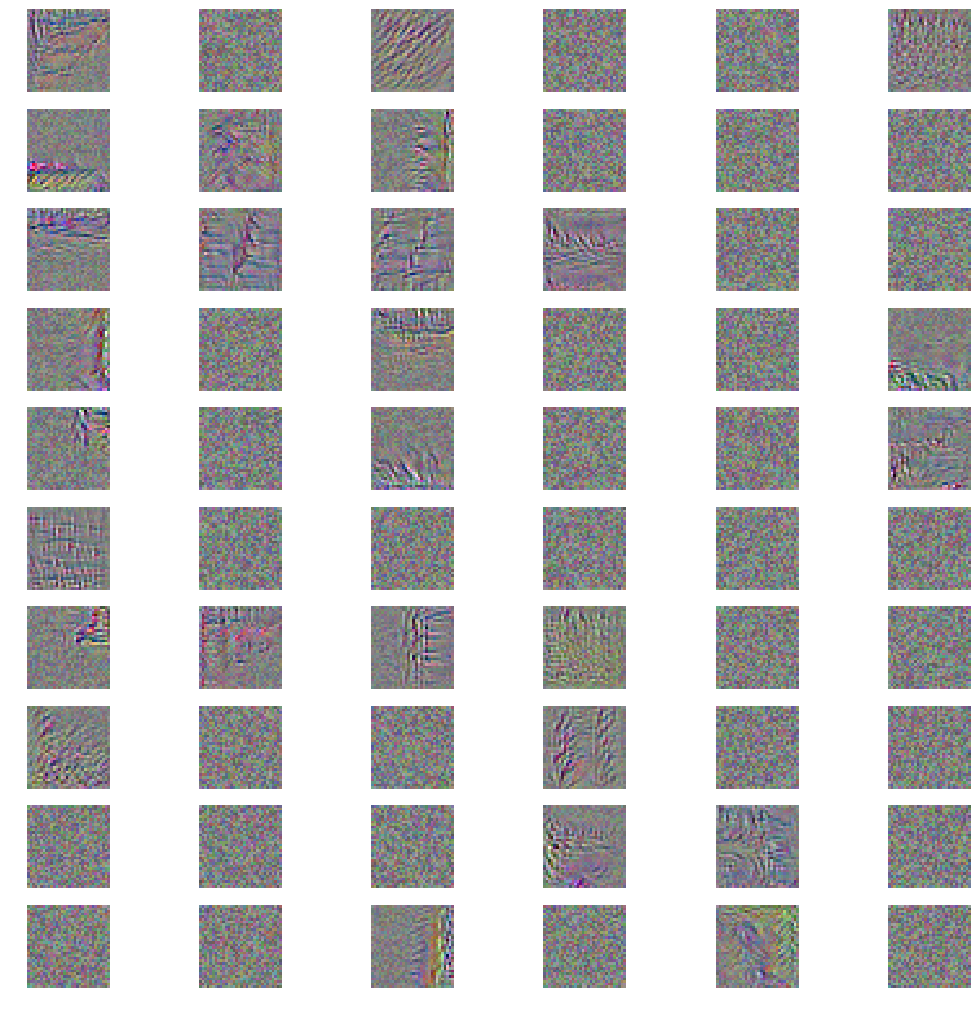

In [44]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

layer_name = 'conv2d_6'
rows = 6
cols = 6
fig,ax = plt.subplots(10, 6, sharex=True, sharey=True, figsize=(18,18))
ax = ax.flatten()

i = 0
for l in range(68,128):
    
    img=mpimg.imread('%s_filter_%d.png' % (layer_name, l))
    
    ax[i].imshow(img)
    ax[i].axis('off')
    i += 1

Populating the interactive namespace from numpy and matplotlib


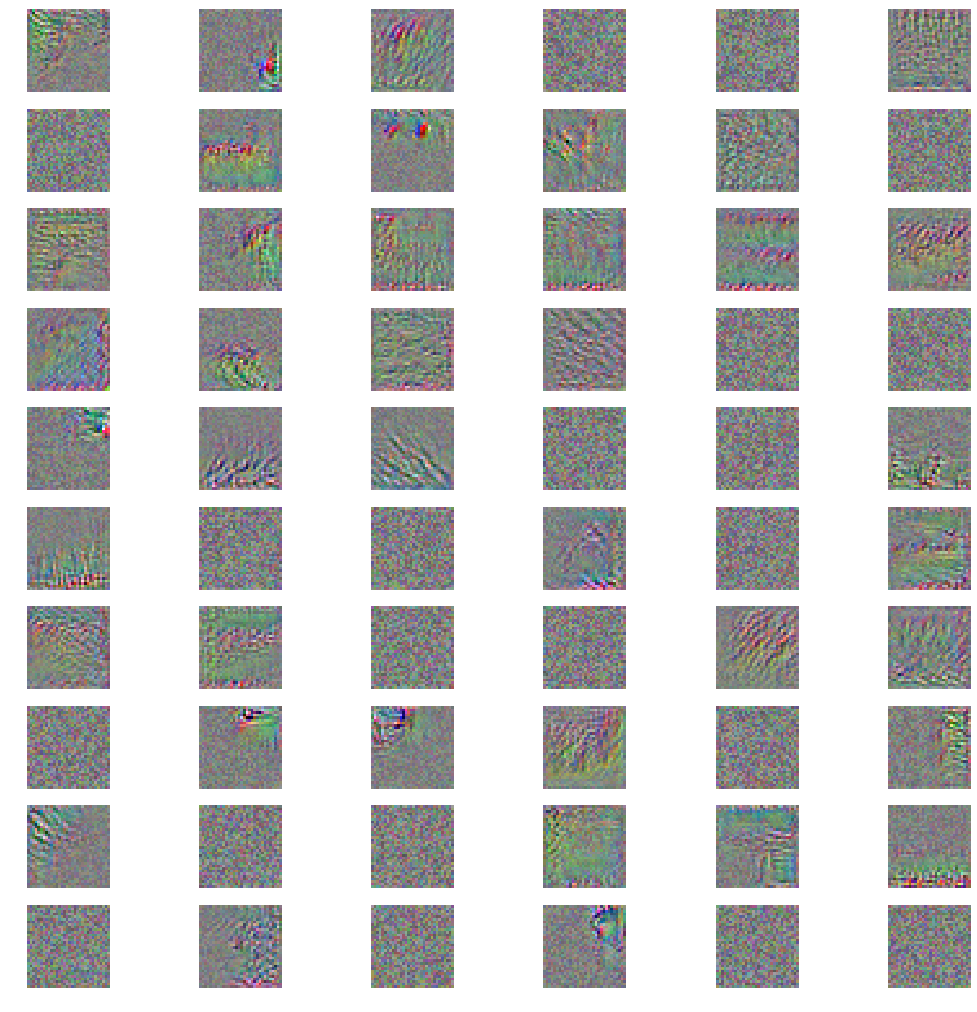

In [28]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

layer_name = 'conv2d_6'
rows = 6
cols = 6
fig,ax = plt.subplots(10, 6, sharex=True, sharey=True, figsize=(18,18))
ax = ax.flatten()

i = 0
for l in range(68,128):
    
    img=mpimg.imread('%s_filter_%d.png' % (layer_name, l))
    
    ax[i].imshow(img)
    ax[i].axis('off')
    i += 1

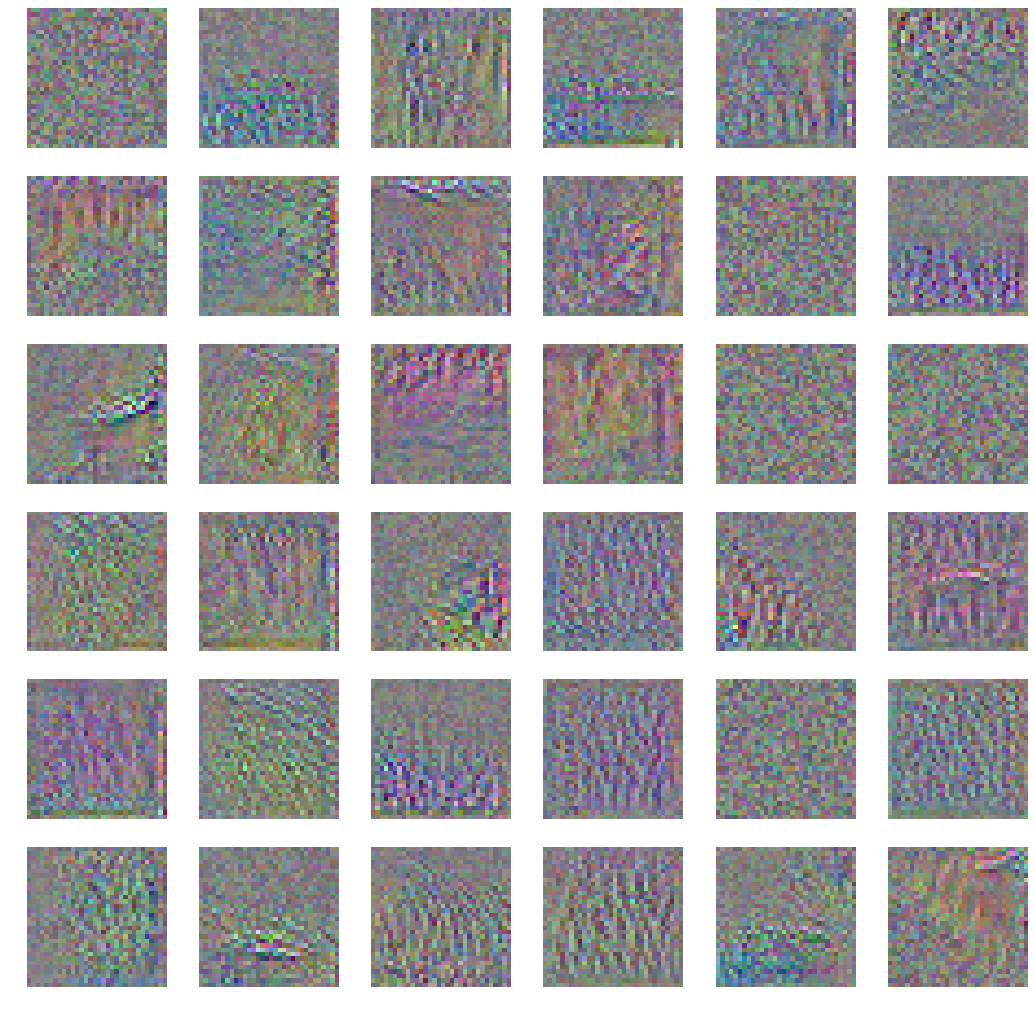

In [18]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

layer_name = 'conv2d_6'
rows = 6
cols = 6
fig,ax = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(18,18))
ax = ax.flatten()

i = 0
for l in range(92,128):
    
    img=mpimg.imread('%s_filter_%d.png' % (layer_name, l))
    
    ax[i].imshow(img)
    ax[i].axis('off')
    i += 1

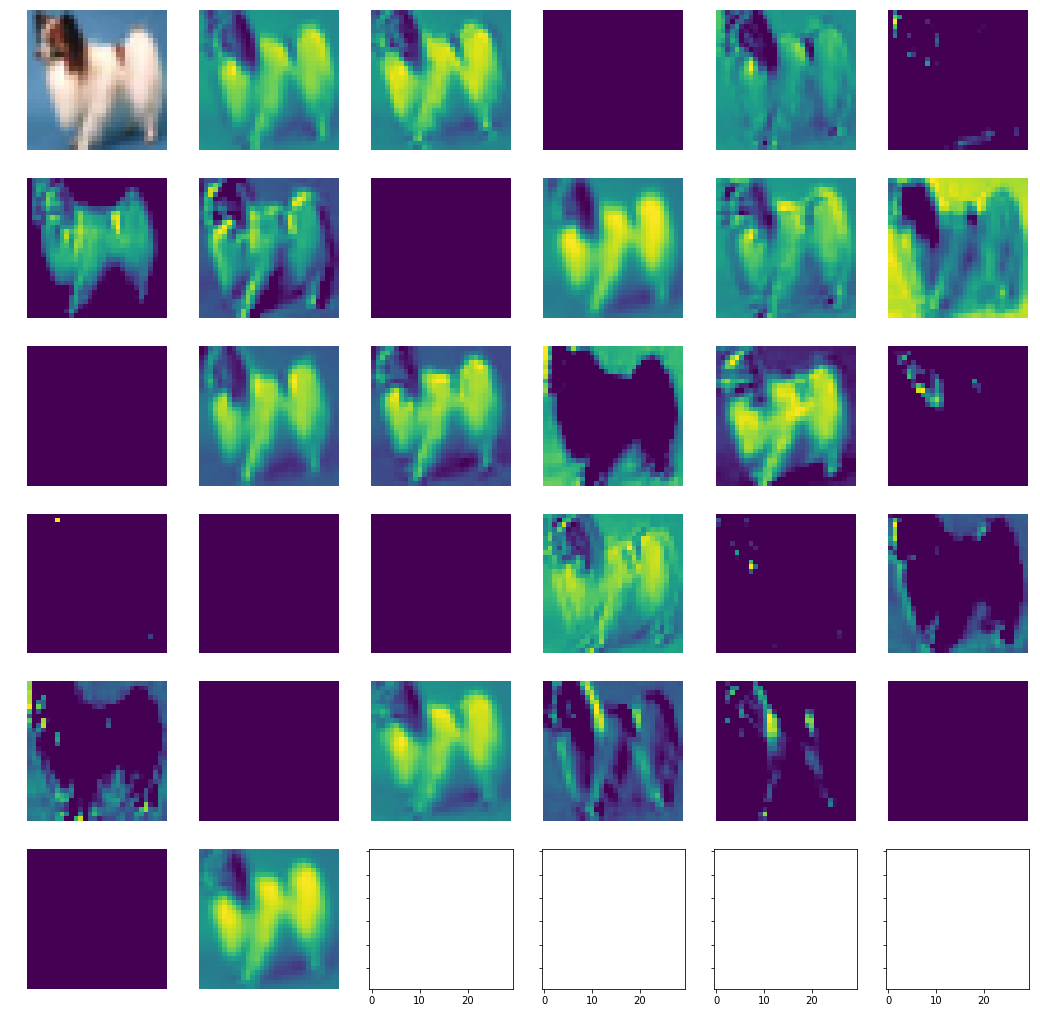

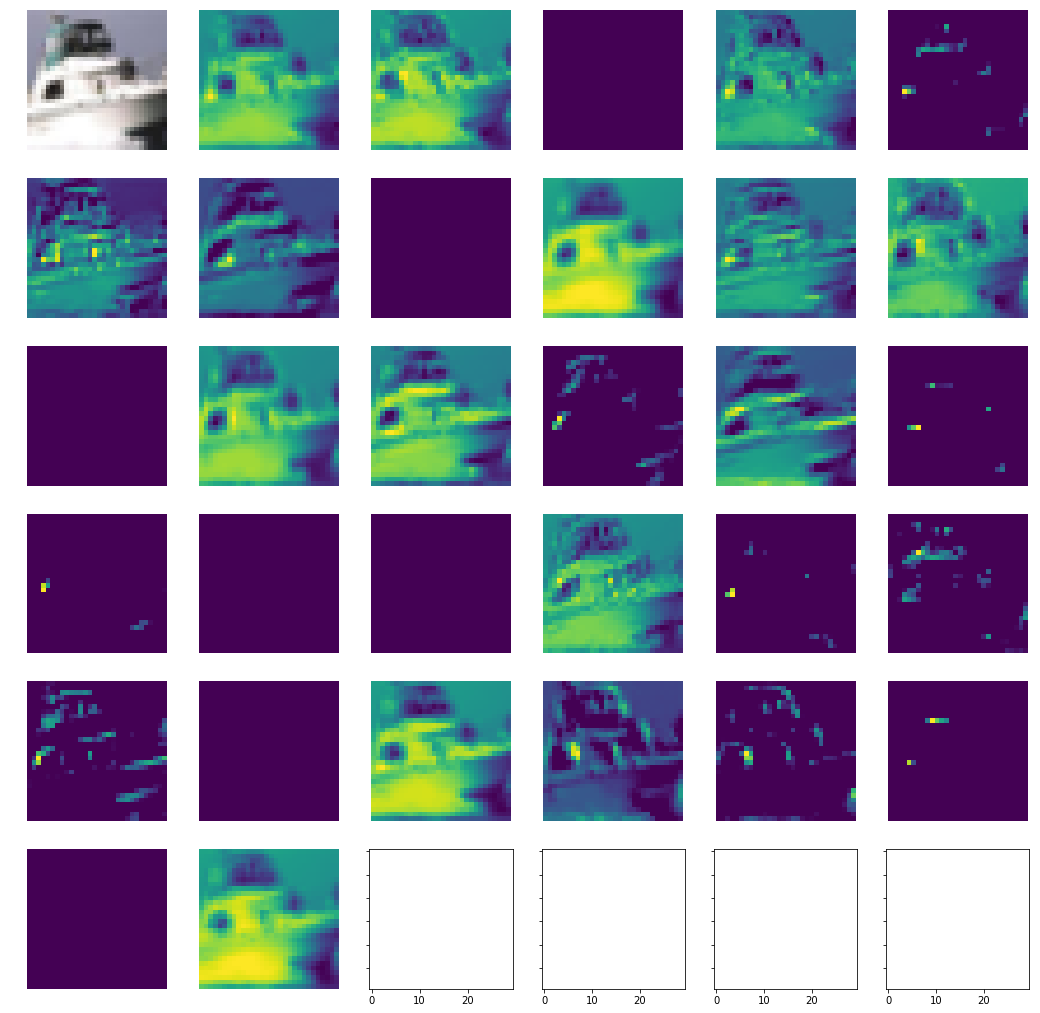

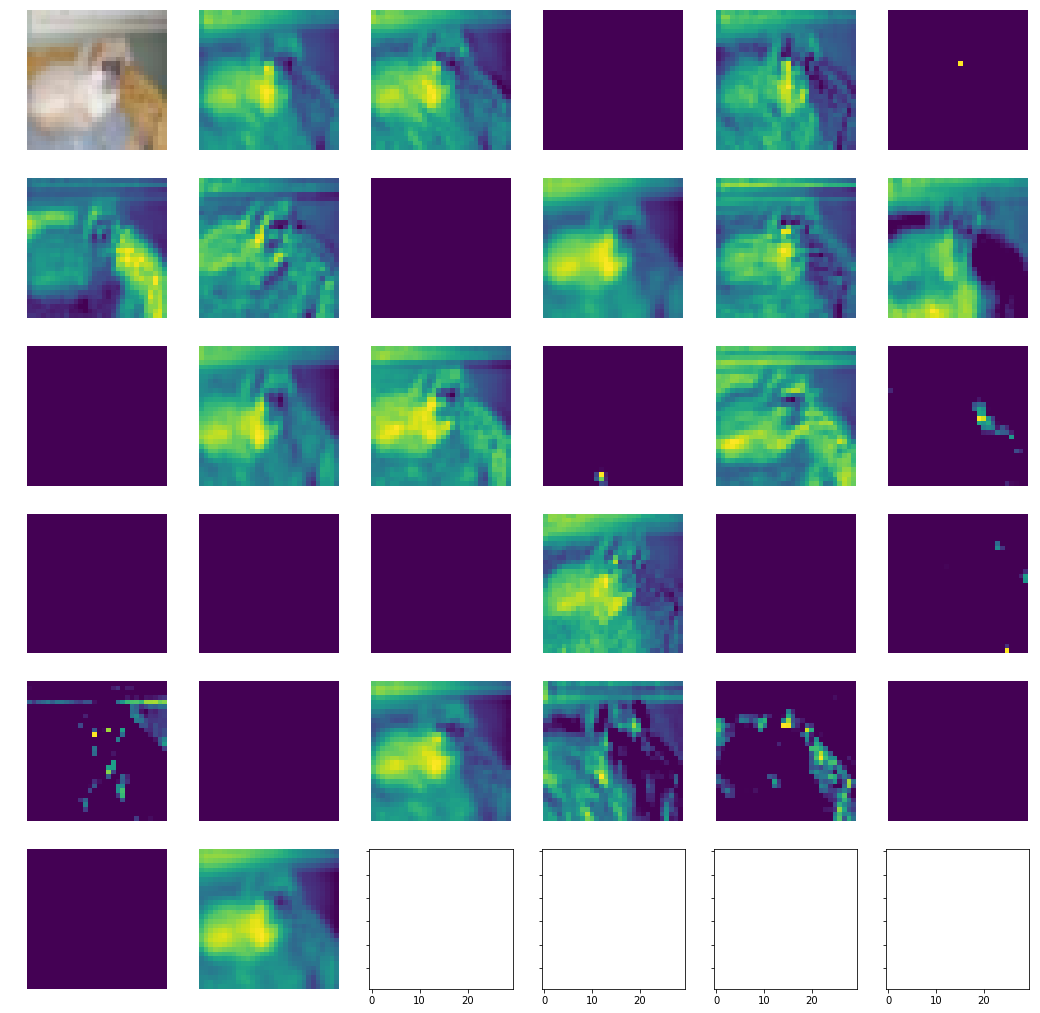

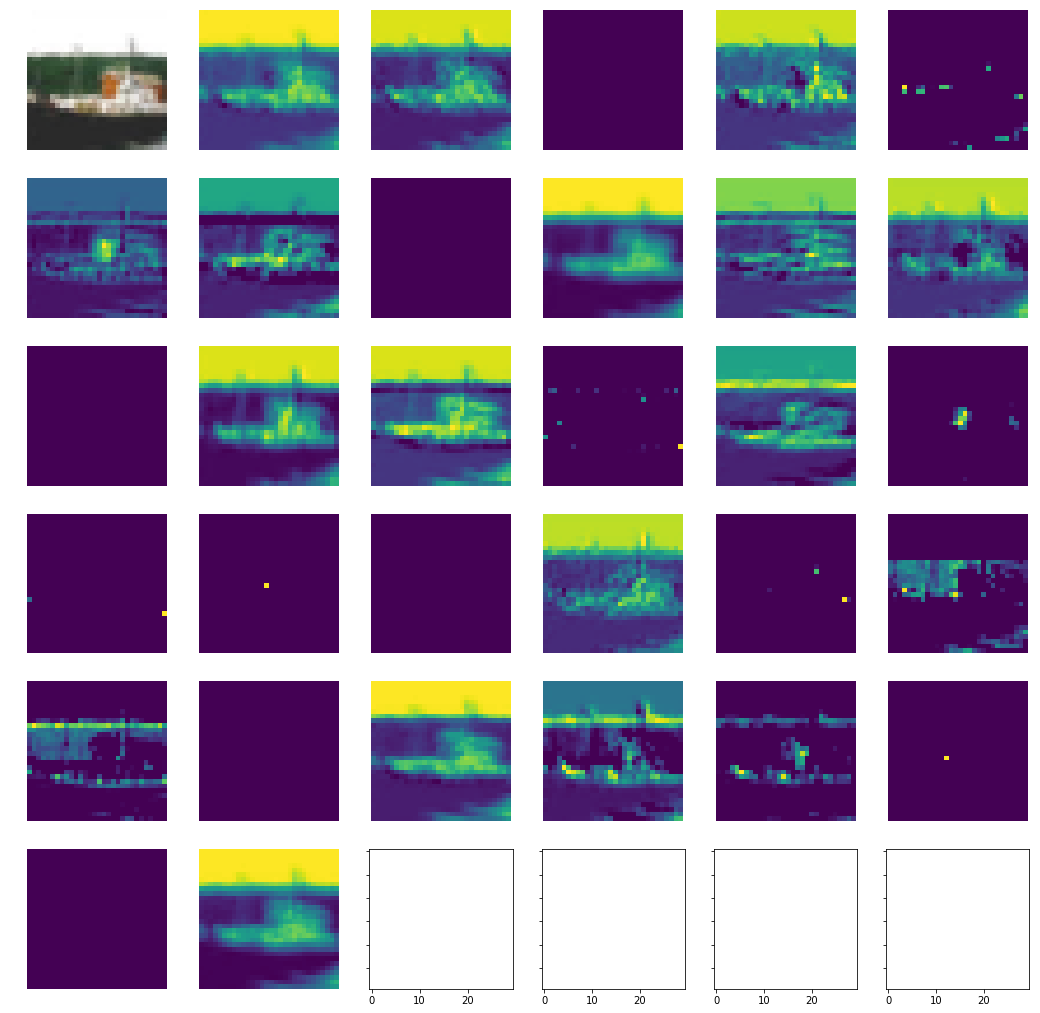

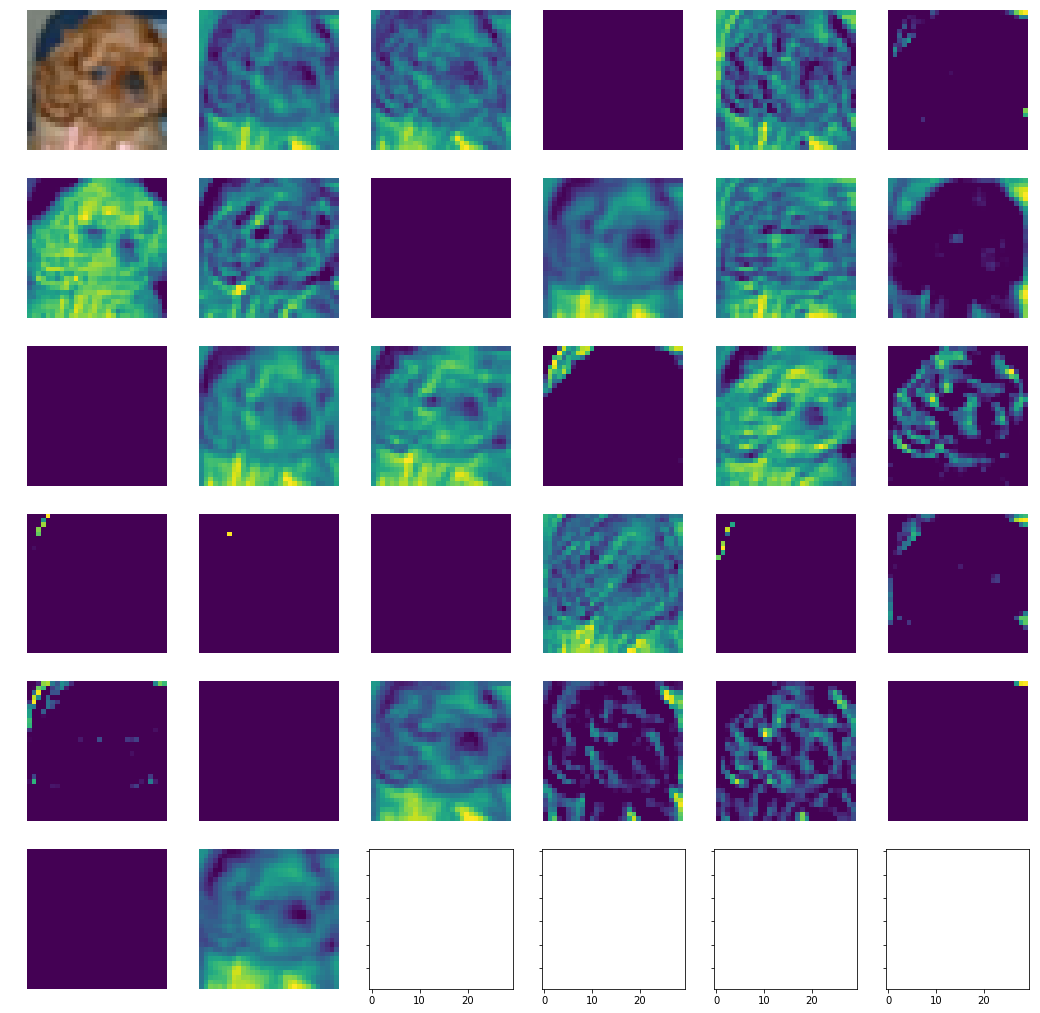

In [76]:
model_1 = models.Sequential()
model_1.add(layer_dict['conv2d_1'])
conv_img_pred = [] 

for i in range(4000,4005):
    fig,ax = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(18,18))
    ax = ax.flatten()
    
    image = cx_train[i:i+1,:,:]
    
    ax[0].imshow(cx_train[i:i+1,:,:].reshape(32,32,3))
    ax[0].axis('off') 
    
    conv_images = np.squeeze(model_1.predict(image), axis=0)
    
    
    for j in range(1, conv_images.shape[2]):
        ax[j].imshow(conv_images[:,:,j]) 
        # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[j].axis('off')  
    avg_img = np.sum(conv_images, axis=2)/32
    ax[j].imshow(avg_img) 
    ax[j].axis('off') 
        
        
        

In [20]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d_1': <keras.layers.convolutional.Conv2D at 0x13d218160>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x13d22b1d0>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x13d22b7f0>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x13d218630>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x13d218b70>,
 'flatten_1': <keras.layers.core.Flatten at 0x13d1ed748>,
 'dense_1': <keras.layers.core.Dense at 0x13d1ede48>,
 'dense_2': <keras.layers.core.Dense at 0x13d1edd68>}

In [85]:
conv2d_1_output = layer_dict['conv2d_1'].output
conv2d_1_output[0][:,:,0].float_val

AttributeError: 'Tensor' object has no attribute 'float_val'

In [82]:
#Convert tensorflow to numpy array
import tensorflow as tf
ph = tf.placeholder(tf.float32, shape=(30, 30))
def convert_to_nparray(tensor):
    type(tensor)
    with tf.Session() as sess:
        array = tensor.eval(sess)
        print (array)

In [84]:
convert_to_nparray(conv2d_1_output[0][:,:,0])

TypeError: input must be a dictionary

In [ ]:
from keras import backend as K

In [59]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = deprocess_image(conv2d_1_output[0])
print(img)
#imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

AttributeError: 'Tensor' object has no attribute 'mean'